In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Customer segmentation for targeted marketing campaign

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Data Cleaning

In [1363]:
# Load dataset
path_data_marketing = r"C:\Users\LaurèneDAVID\Documents\Teaching\Educational_apps\app-hec-AI-DS\data\clustering\marketing_campaign.csv"
marketing_data = pd.read_csv(path_data_marketing, sep=";")

In [1364]:
# Delete columns
marketing_data.drop(columns=['ID','MntGoldProds','Response','Complain','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2',
                             'Z_CostContact', 'Z_Revenue'], inplace=True)

#marketing_data = marketing_data.loc[marketing_data["Marital_Status"].isin(["Single","Married","Divorced"])]
marketing_data.drop(columns=["Marital_Status"], inplace=True)

# marketing_data = marketing_data.loc[marketing_data["Education"].isin(["2n Cycle","Graduation","Master","PhD"])]
marketing_data.drop(columns=["Education"],inplace=True)

marketing_data = marketing_data[marketing_data["Income"]>5000]

In [1365]:
# Change column names
new_columns = [col.replace("Mnt","").replace("Num","") for col in list(marketing_data.columns)]
new_columns = [col + "Products" if col in ["Wines","Fruits"] else col for col in new_columns]
marketing_data.columns = new_columns

### Data Preprocessing

In [1366]:
# Proportion of a customer's income spent on wines, fruits, ...
products_col = ["WinesProducts","FruitsProducts", "MeatProducts","FishProducts","SweetProducts"]
total_amount_spent = marketing_data[products_col].sum(axis=1)

for col in products_col:
    marketing_data[col] = (100*marketing_data[col] / total_amount_spent).round(1)

In [1367]:
# Proportion of web, catalog and store purchases (based on total number of purchases)
purchases_col = ["WebPurchases", "CatalogPurchases", "StorePurchases"]
total_purchases = marketing_data[purchases_col].sum(axis=1)

for col in purchases_col:
    marketing_data[col] = (100*marketing_data[col] / total_purchases).round(1)

In [1368]:
from datetime import datetime, date

def get_number_days(input_date):
    date1 = datetime.strptime(input_date, '%d/%m/%Y').date()
    date2 = date(2022, 2, 13)
    return (date2 - date1).days

In [1369]:
# Compute a customer's age, based on year of birth
marketing_data.insert(0, "Age", marketing_data["Year_Birth"].apply(lambda x: 2023-x))

# Compute the number of days a customer has been subscribed 
marketing_data.insert(1, "Days_subscription", marketing_data["Dt_Customer"].apply(get_number_days))

# Compute total number of kids (kids + teens)
marketing_data["Kids"] = marketing_data["Kidhome"] + marketing_data["Teenhome"]
marketing_data.drop(columns=["Kidhome","Teenhome"], inplace=True)

marketing_data.drop(columns=["Year_Birth", "Dt_Customer"], inplace=True)
marketing_data.dropna(inplace=True)

In [1370]:
path_cleandata = r"C:\Users\LaurèneDAVID\Documents\Teaching\Educational_apps\app-hec-AI-DS\data\clustering"
marketing_data.to_pickle(os.path.join(path_cleandata,"clean_marketing.pkl"))

In [1371]:
pd.read_pickle(os.path.join(path_cleandata,"clean_marketing.pkl"))

,Age,Days_subscription,Income,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,SweetProducts,DealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,Kids
0,66,3449,58138.0,58,41.5,5.8,35.7,11.2,5.8,3,36.4,45.5,18.2,7,0
1,69,2899,46344.0,38,52.4,4.8,28.6,9.5,4.8,2,25.0,25.0,50.0,5,2
2,58,3098,71613.0,26,58.0,6.7,17.3,15.1,2.9,1,40.0,10.0,50.0,4,0
3,39,2925,26646.0,26,22.9,8.3,41.7,20.8,6.2,2,33.3,0.0,66.7,6,1
4,42,2947,58293.0,94,42.5,10.6,29.0,11.3,6.6,5,35.7,21.4,42.9,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,3167,61223.0,46,64.8,3.9,16.6,3.8,10.8,2,56.2,18.8,25.0,5,1
2236,77,2805,64014.0,56,93.1,0.0,6.9,0.0,0.0,7,53.3,13.3,33.3,7,3
2237,42,2941,56981.0,91,74.6,3.9,17.8,2.6,1.0,1,11.1,16.7,72.2,6,0
2238,67,2942,69245.0,8,54.7,3.8,27.4,10.2,3.8,2,28.6,23.8,47.6,3,1


In [1372]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

num_columns = marketing_data.select_dtypes(include=["int64", "float64"]).columns

# Build data processing pipeline
ct = ColumnTransformer(
    [("numerical", RobustScaler(), num_columns)])

X = ct.fit_transform(marketing_data)

In [1373]:
columns_transform = [col.split("__")[1] for col in ct.get_feature_names_out()]
df_clean = pd.DataFrame(X, columns=columns_transform)

### Clustering

In [1374]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def clustering_model(X, list_nb_clusters):
    dict_labels = dict()
    list_scores = []

    for n in list_nb_clusters:
        kmeans = KMeans(n_clusters=n, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        dict_labels[f"{n} clusters"] = labels
        list_scores.append(score)

    return list_scores, dict_labels

In [1375]:
list_nb_clusters = np.arange(2,7)
scores_kmeans, labels_kmeans = clustering_model(X, list_nb_clusters)

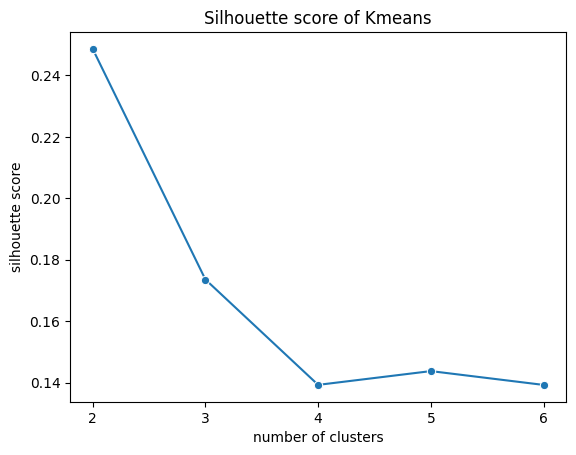

In [1376]:
marketing_data_results = pd.DataFrame({"nb_clusters":[str(i) for i in np.arange(2,7)], "scores":scores_kmeans})

sns.lineplot(data=marketing_data_results, x="nb_clusters", y="scores", marker="o")
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.title("Silhouette score of Kmeans")
plt.show()

### Save results

In [1377]:
import os
path_results = r"C:\Users\LaurèneDAVID\Documents\Teaching\Educational_apps\app-hec-AI-DS\data\clustering\results"

for nb_clusters in list_nb_clusters:
    labels_ = labels_kmeans[f"{nb_clusters} clusters"] # chosen labels
    marketing_data_labels = marketing_data.copy()
    marketing_data_labels["Group"] = labels_
    marketing_data_labels["Group"] = marketing_data_labels["Group"].astype(int)

    df_mean_results = marketing_data_labels.groupby("Group")[num_columns].mean().reset_index()
    df_mean_results = df_mean_results.round(1).melt(id_vars=["Group"])
    df_mean_results = pd.pivot_table(df_mean_results, values='value', index=['variable'], columns=["Group"])

    df_mean_results.to_pickle(os.path.join(path_results,f"results_{nb_clusters}_clusters.pkl"))